   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

C:\Users\sai\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sai\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sai\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sai\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default valu

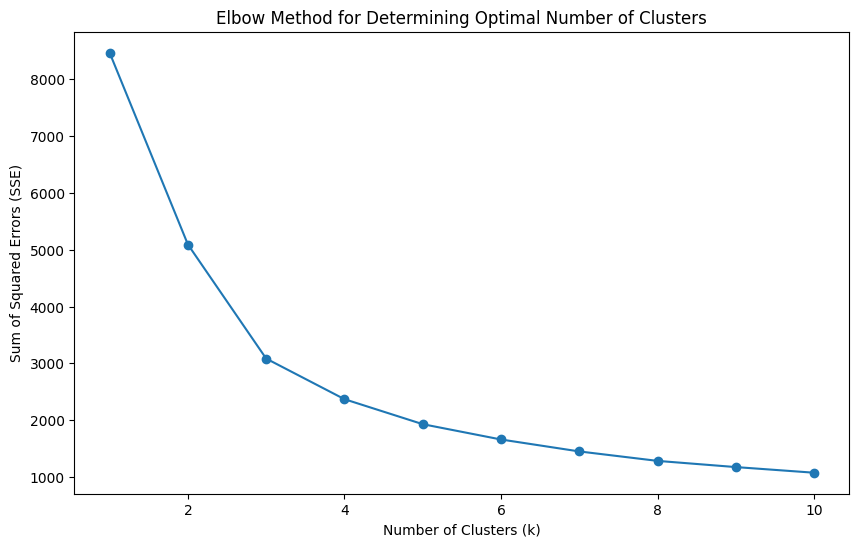

C:\Users\sai\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


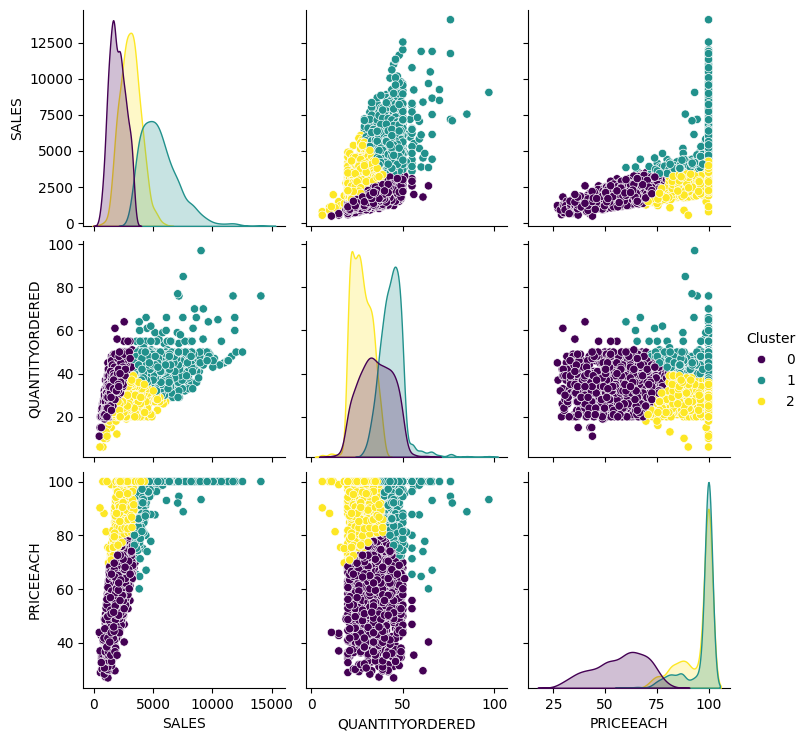

Cluster Centers (Standardized):
[[-0.83846133  0.00340709 -1.31519107]
 [ 1.10107381  0.89846585  0.64278204]
 [-0.2525054  -0.79188456  0.55612886]]
Cluster Centers (Original Scale):
[[2009.8299546    35.12599319   57.13021566]
 [5581.55927313   43.84361233   96.62390969]
 [3088.89056093   27.38007737   94.87605416]]


In [174]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'sales_data_sample.csv'  # Update this path if necessary
data = pd.read_csv(file_path, encoding='latin1')  # 'latin1' encoding to handle any special characters

# Inspect the data
print(data.head())
print(data.info())

# Select relevant columns for clustering (based on understanding of data)
# Here, we choose numeric features that might be relevant for clustering, like 'SALES', 'QUANTITYORDERED', 'PRICEEACH'
# You may modify these columns based on your analysis of the dataset
numeric_data = data[['SALES', 'QUANTITYORDERED', 'PRICEEACH']].dropna()

# Standardize the data for better clustering results
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Determine the optimal number of clusters using the elbow method
sse = []  # Sum of squared distances
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)  # Inertia: sum of squared distances to the nearest cluster center

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.show()

# Choose the optimal k based on the elbow plot, for example k = 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters with a pairplot (if there are multiple features)
sns.pairplot(data[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'Cluster']], hue='Cluster', palette='viridis')
plt.show()

# Print cluster centroids
print("Cluster Centers (Standardized):")
print(kmeans.cluster_centers_)

# If you want to print the centroids in the original scale
original_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (Original Scale):")
print(original_centers)


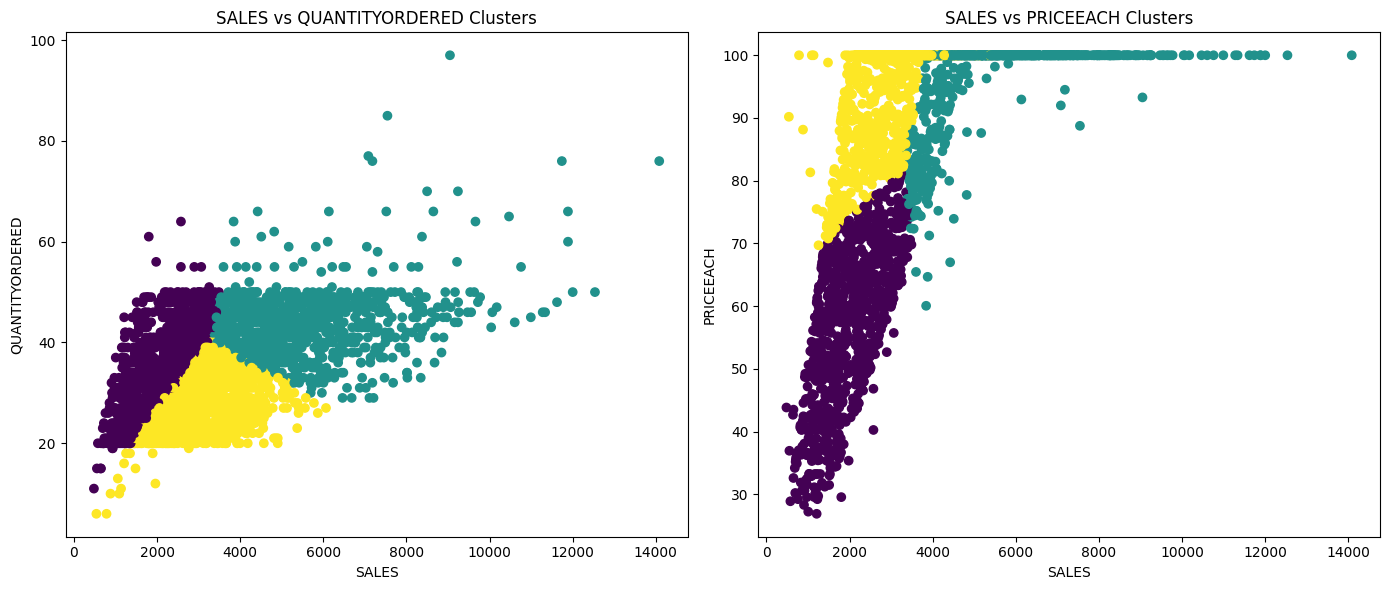

In [176]:
plt.figure(figsize=(14, 6))

# Scatter plot for SALES vs QUANTITYORDERED
plt.subplot(1, 2, 1)
plt.scatter(data['SALES'], data['QUANTITYORDERED'], c=data['Cluster'], cmap='viridis', marker='o')
plt.xlabel('SALES')
plt.ylabel('QUANTITYORDERED')
plt.title('SALES vs QUANTITYORDERED Clusters')

# Scatter plot for SALES vs PRICEEACH
plt.subplot(1, 2, 2)
plt.scatter(data['SALES'], data['PRICEEACH'], c=data['Cluster'], cmap='viridis', marker='o')
plt.xlabel('SALES')
plt.ylabel('PRICEEACH')
plt.title('SALES vs PRICEEACH Clusters')

plt.tight_layout()
plt.show()

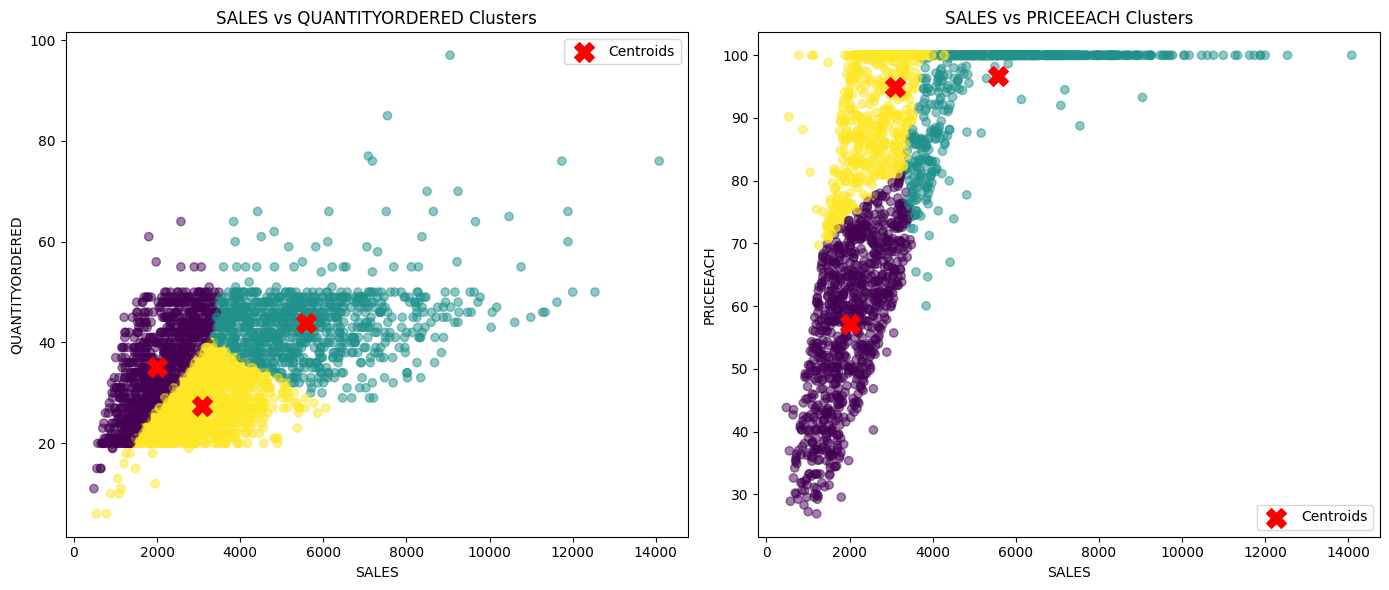

In [182]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Visualize clusters with scatter plots and centroids in red
plt.figure(figsize=(14, 6))

# Scatter plot for SALES vs QUANTITYORDERED
plt.subplot(1, 2, 1)
plt.scatter(data['SALES'], data['QUANTITYORDERED'], c=data['Cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('SALES')
plt.ylabel('QUANTITYORDERED')
plt.title('SALES vs QUANTITYORDERED Clusters')
plt.legend()

# Scatter plot for SALES vs PRICEEACH
plt.subplot(1, 2, 2)
plt.scatter(data['SALES'], data['PRICEEACH'], c=data['Cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 2], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('SALES')
plt.ylabel('PRICEEACH')
plt.title('SALES vs PRICEEACH Clusters')
plt.legend()

plt.tight_layout()
plt.show()

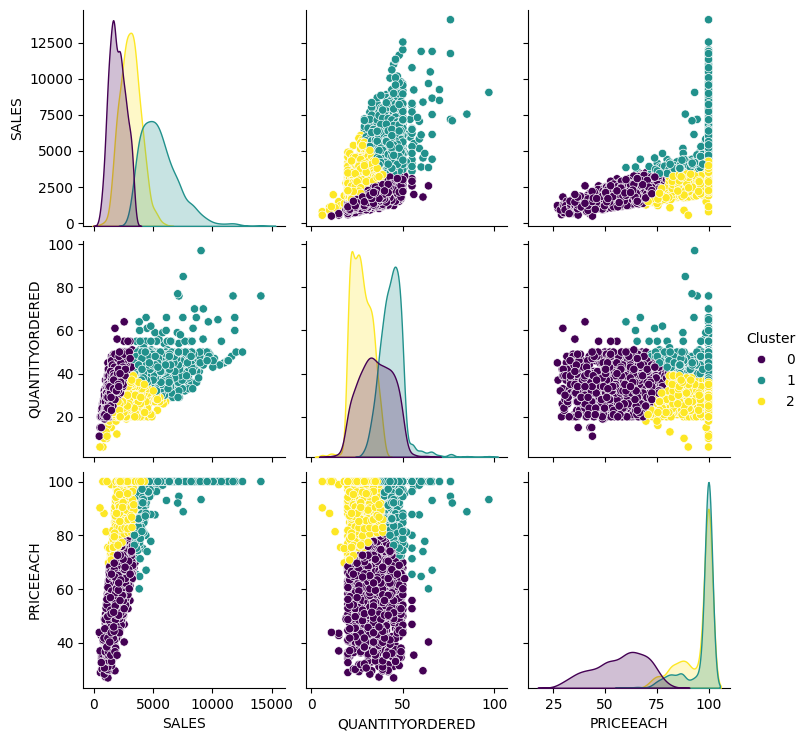

In [188]:
sns.pairplot(data[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'Cluster']], hue='Cluster', palette='viridis')
plt.show()


In [184]:
print("Cluster Centers (Standardized):")
print(kmeans.cluster_centers_)

Cluster Centers (Standardized):
[[-0.83846133  0.00340709 -1.31519107]
 [ 1.10107381  0.89846585  0.64278204]
 [-0.2525054  -0.79188456  0.55612886]]
